## Dados

Neste trabalho usam-se 3 datasets:
-Paises;
-Consumo de café;
-Felicidade;

A ideia é trabalhar estes dados, usando datasets. Pretendo demonstrar muito do que foi aprendido nas aulas, fazer algumas análises explicativas do trabalho que foi sendo desenvolvido nesses datasets e por fim ter um dashboard onde se finaliza também com algumas demonstrações do que foi aprendido nas aulas.



## Primeiro tratamento de dados

Aqui carregam-se os dois primeiros datasets. O de Paises e depois o de coffee. O de Coffee não é o inicialmente proposto já que esse se revelou mau.
Este também é limitado (tem a UE agrupada o que impede a analise de paises como o nosso) mas é muito mais assertivo.
<br> Em ambos, verificam-se por valores vazios e apresenta-se no ecrã.
<br> No caso de paises, várias colunas apresentavam valores vazios. Estas células foram substituidas pelo valor zero.

<div class="alert alert-block alert-info">
<p>ℹ️<b>Nota 1</b></p>
   <p>
depois de análise exaustiva, cheguei à conclusão que, com este dataset, não se conseguia aferir, propriamente, as conclusões a que nos tinhamos proposto (ligar ou não o consumo de café a felicidade), por isso, continuo a assumir que os marcadores escolhidos, são os ideiais para este tipo de análise.
</p>
</div>

In [1866]:
import pandas as pd

# Load the dataset into a DataFrame
dfCountries = pd.read_csv('Dados/countries of the world.csv')

# Display the first few rows of the DataFrame
dfCountries.head()

dfCoffee = pd.read_csv('Dados/psd_coffee.csv')

# Check for missing values in each column
missing_valuesCountries = dfCountries.isna().sum()
missing_valuesCoffee = dfCoffee.isna().sum()
print(f'Missing values in each column Countries:\n {missing_valuesCountries}\n and Cofeee:\n{missing_valuesCoffee}')


Missing values in each column Countries:
 Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64
 and Cofeee:
Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Mark

### Substituir todos os valores por zero

In [1867]:
dfCountries = dfCountries.fillna(0)
dfCoffee = dfCoffee.fillna(0)
# Check AGAIN for missing values in each column
missing_valuesCountries = dfCountries.isna().sum()
missing_valuesCoffee = dfCoffee.isna().sum()
print(f'Missing values in each column Countries:\n {missing_valuesCountries}\n and Cofeee:\n{missing_valuesCoffee}')


Missing values in each column Countries:
 Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64
 and Cofeee:
Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year             

## Analise do dataset de Café

Primeiro ver que tipos de dados temos

In [1868]:
#Show me the type of each column for Coffee
print(dfCoffee.dtypes)

Commodity_Code             int64
Commodity_Description     object
Country_Code              object
Country_Name              object
Market_Year                int64
Calendar_Year              int64
Month                      int64
Attribute_ID               int64
Attribute_Description     object
Unit_ID                    int64
Unit_Description          object
Value                    float64
dtype: object


Trabalhá-los pois quero que fique apenas uma média do consumo domestico.
No final depois tudo é guardado num ficheiro csv para poder ser usado fora deste jupiterbook

In [1869]:

dfCoffee_grouped = dfCoffee[dfCoffee['Attribute_Description'] == 'Domestic Consumption'].groupby('Country_Name').sum()
dfCoffee_avg = dfCoffee.groupby(['Country_Name', 'Attribute_Description'])['Value'].mean().reset_index()

dfCoffee_filtered = dfCoffee_avg[dfCoffee_avg['Attribute_Description'] == 'Domestic Consumption']

#Change the column named Value to Coffee Domestic Consumption
dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)
dfCoffee_filtered.to_csv('DadosTratados/CoffeeTreated.csv', index=False)


/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_3556/643515934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)


### Um gráfico para ver a evolução do consumo ao longo dos anos.

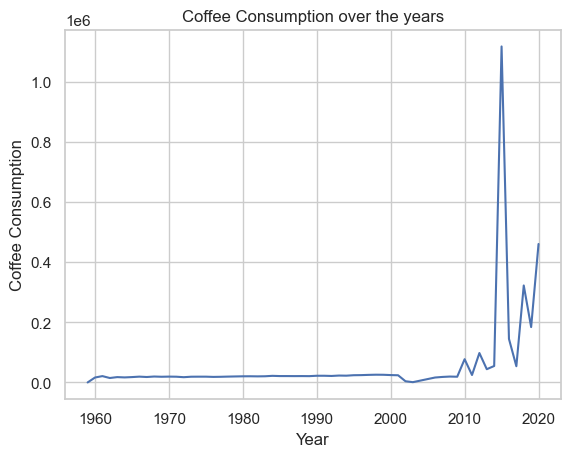

In [1870]:
#Show me a graph with the evolutin of the coffee consumption in the world over the years
import matplotlib.pyplot as plt
dfCoffee_grouped = dfCoffee[dfCoffee['Attribute_Description'] == 'Domestic Consumption'].groupby('Calendar_Year').sum()

plt.plot(dfCoffee_grouped.index, dfCoffee_grouped['Value'])
plt.xlabel('Year')
plt.ylabel('Coffee Consumption')
plt.title('Coffee Consumption over the years')
plt.show()

Este gráfico mostra que, estranhamente, perto do ano 2015 o consumo dispara para valores completamente diferentes do resto dos anos.

In [1871]:
# Show the total of Domestic Consumption of Coffee in the world in the year 2015
dfCoffee_2015 = dfCoffee[(dfCoffee['Attribute_Description'] == 'Domestic Consumption') & (dfCoffee['Calendar_Year'] == 2015)]

print(f'Total of Domestic Consumption of Coffee in the world in the year 2015: {dfCoffee_2015["Value"].sum()}')


Total of Domestic Consumption of Coffee in the world in the year 2015: 1117357.0


Realmente, se formos ver esse ano, a verdade é que esse é o valor da soma. Já se sabe que a qualidade destes datasets é duvidosa, por isso vou aproveitar a oportunidade para tentar descobrir se há erro, se é mesmo assim, ou se existe algum tipo de explicação para este desvio tão grande. Assim vou tentar descobrir onde estão os outliers especificamente.

In [1872]:
#Filter dfcoffee to show only Domestic Consumption
dfCoffee_domestic = dfCoffee[dfCoffee['Attribute_Description'] == 'Domestic Consumption']

#Filter to show only 2015
dfCoffee_domestic_2015 = dfCoffee_domestic[dfCoffee_domestic['Calendar_Year'] == 2015]

#Show the type of each column for Coffee
print(dfCoffee_domestic_2015.dtypes)


Commodity_Code             int64
Commodity_Description     object
Country_Code              object
Country_Name              object
Market_Year                int64
Calendar_Year              int64
Month                      int64
Attribute_ID               int64
Attribute_Description     object
Unit_ID                    int64
Unit_Description          object
Value                    float64
dtype: object


Agora vou fazer um gráfico para tentar descobrir os outliers

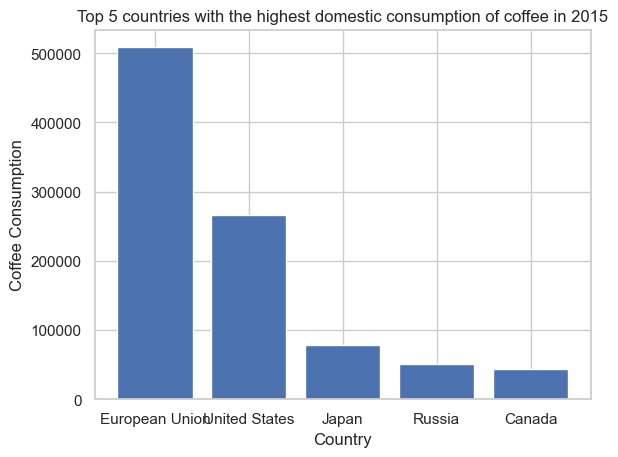

In [1873]:
# Use a graph to show the top 5 countries with the highest domestic consumption of coffee in 2015
dfCoffee_domestic_2015_grouped = dfCoffee_domestic_2015.groupby('Country_Name').sum().sort_values(by='Value', ascending=False).head(5)
#Plot the graph
plt.bar(dfCoffee_domestic_2015_grouped.index, dfCoffee_domestic_2015_grouped['Value'])

plt.xlabel('Country')
plt.ylabel('Coffee Consumption')
plt.title('Top 5 countries with the highest domestic consumption of coffee in 2015')

plt.show()

Ok. Vê-se aqui que foi realmente a EU a contribuir para esses numeros. Vale a pena verificar por ano para confirmar.

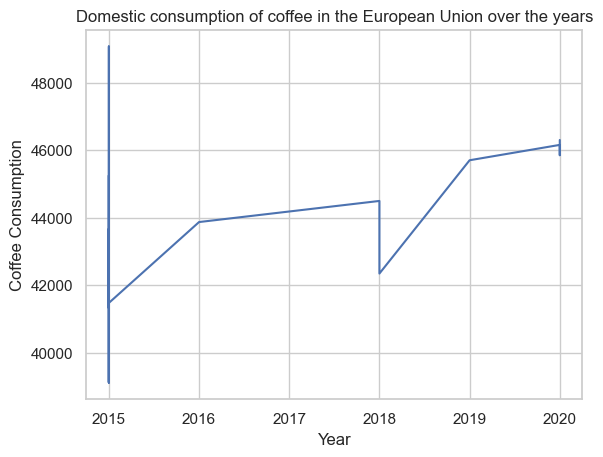

In [1874]:
#Filter to show only the countrie European Union

dfCoffee_domestic_AllYear = dfCoffee_domestic[dfCoffee_domestic['Country_Name'] == 'European Union']
#Plot a line graph to show all the years of domestic consumption of coffee in the European Union
plt.plot(dfCoffee_domestic_AllYear['Calendar_Year'], dfCoffee_domestic_AllYear['Value'])
plt.xlabel('Year')
plt.ylabel('Coffee Consumption')
plt.title('Domestic consumption of coffee in the European Union over the years')

plt.show()

Mas é este o único problema do dataset ou há mais?

In [1917]:
#Show me how many different months i have in the dataset from 2015 onwards
dfCoffee_2015_onwards = dfCoffee[dfCoffee['Calendar_Year'] >= 2015]
months = dfCoffee_2015_onwards['Month'].unique()
print(f'Number of different months in the dataset from 2015 onwards: {len(months)}')


Number of different months in the dataset from 2015 onwards: 2


Aqui está. O "problema" é que a União Europeia só começa a ter dados apartir do ano de 2015 e além disso só existem dois meses. Por isso sobe brutalmente o gráfico.
Mesmo assim, o ano de 2015 continua a ter uma disparidade muito grande e os outros passam a ser "normais".
<br> Aqui, uma explicação poderia ser que o ano de 2015 é um acumulado de anos passados.
<br> Outra seria o metodo de classificação.
<br> A mais razoável é que, como todos os outros datasets trabalhados neste projeto, os dados estão muito mal trabalhados.
<br>Não consigo explicar a falta de meses. Porque apenas dois? Ok. Sõ os meses 6 e 12, podia ser por semestre... mas depois há uns paises que têm e outros não.
<br> Mais adiante, onde junto todos os datasets. Deveria juntar apenas 2019 do café, mas está tão fraco que todo o trabalho deixaria de ter sentido. Por isso decidi manter a média de todos os anos. O racional foi: se, por alguma razão, estes números estão bem, então uma média será o valor mais aproximado que deve ser mostrado.

## Analise do dataset de Paises

#### Verificar se os dados podem ser usados ou se é preciso fazer alguma tranformação


In [1875]:
#Show me the type of each column
print(f'Type of each column Countries:\n {dfCountries.dtypes}\n and Cofeee:\n{dfCoffee.dtypes}')

Type of each column Countries:
 Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object
 and Cofeee:
Commodity_Code       

In [1876]:
#Convert the column phones (per 1000) to float
dfCountries['Phones (per 1000)'] = dfCountries['Phones (per 1000)'].str.replace(',','.').astype(float)

 ### Grafico de Scatter para comparar o GDP e numero de telemoveis por pessoa

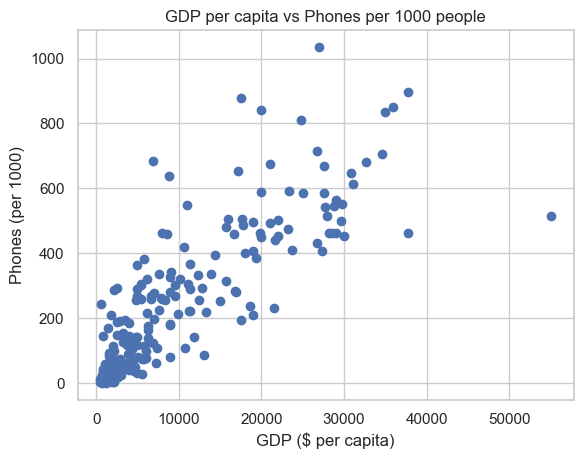

In [1877]:
# Do a scatter plot to compare GDP per capita and phones per 1000 people
import matplotlib.pyplot as plt
plt.scatter(dfCountries['GDP ($ per capita)'], dfCountries['Phones (per 1000)'])
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Phones (per 1000)')
plt.title('GDP per capita vs Phones per 1000 people')
plt.show()



Confirma-se que quanto maior a riqueza, maior o numero de telemoveis por cabeça.

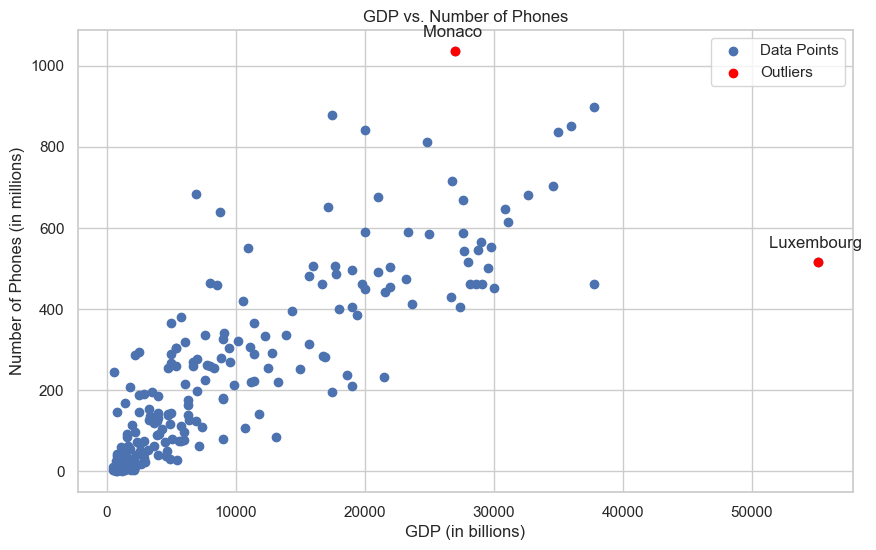

In [1878]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the z-scores to identify outliers
dfCountries['GDP_zscore'] = (dfCountries['GDP ($ per capita)'] - dfCountries['GDP ($ per capita)'].mean()) / dfCountries['GDP ($ per capita)'].std()
dfCountries['Phones_zscore'] = (dfCountries['Phones (per 1000)'] - dfCountries['Phones (per 1000)'].mean()) / dfCountries['Phones (per 1000)'].std()

# Define a threshold to identify outliers
threshold = 3

# Identify outliers
outliers = dfCountries[(dfCountries['GDP_zscore'].abs() > threshold) | (dfCountries['Phones_zscore'].abs() > threshold)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(dfCountries['GDP ($ per capita)'], dfCountries['Phones (per 1000)'], label='Data Points')
plt.scatter(outliers['GDP ($ per capita)'], outliers['Phones (per 1000)'], color='red', label='Outliers')

# Annotate outliers
for i, row in outliers.iterrows():
    plt.annotate(row['Country'], (row['GDP ($ per capita)'], row['Phones (per 1000)']), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('GDP (in billions)')
plt.ylabel('Number of Phones (in millions)')
plt.title('GDP vs. Number of Phones')
plt.legend()
plt.show()



Aqui usando um limite de 3, podemos verificar quais os Paises que saem "fora" do z-score calculado são apenas os "RIQUISSIMOS" Mónaco e Luxemburgo.

### Usar uma tabela pivot para ver a média de produção de café para cada Pais

In [1879]:
# use a pivot table to display the average coffee production for each country and in the columns show the Attribute_Description Column
dfCoffee.pivot_table(index='Country_Name', columns='Attribute_Description', values='Value', aggfunc='mean')


Attribute_Description,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
Country_Name,,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,2067.105263,0.000000,2094.736842,0.000000,0.000000,2094.736842,0.000000,0.000000,0.000000,0.000000,0.000000,2067.631579,27.105263,0.000000,27.631579,2094.736842,2094.736842
Angola,21.475410,879.098361,0.000000,1287.737705,47.901639,1274.344262,879.098361,0.000000,0.000000,913.606557,0.000000,0.000000,892.131148,47.901639,0.000000,0.000000,0.000000,2201.344262,2201.344262
Argentina,0.000000,0.000000,491.315789,0.000000,730.315789,0.000000,0.000000,730.315789,0.000000,0.000000,0.000000,11.105263,0.000000,501.368421,228.947368,0.000000,227.894737,730.315789,730.315789
Australia,0.000000,0.000000,1146.842105,0.000000,1505.000000,0.000000,0.000000,1505.000000,0.000000,0.000000,0.000000,119.210526,0.000000,1266.052632,238.947368,0.000000,238.947368,1505.000000,1505.000000
Benin,0.000000,16.720000,0.000000,0.880000,0.660000,0.880000,16.720000,0.000000,0.000000,17.380000,0.000000,0.000000,17.380000,0.660000,0.000000,0.000000,0.000000,18.260000,18.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,240.344262,7561.311475,82.147541,600.704918,605.442623,681.573770,7915.278689,143.655738,4.819672,8457.934426,71.426230,31.262295,8212.770492,539.426230,66.016393,282.540984,30.245902,9202.295082,9202.295082
Yemen,133.533333,32.200000,0.000000,0.000000,98.333333,0.000000,35.200000,0.000000,0.000000,133.533333,3.000000,0.000000,0.000000,98.333333,0.000000,0.000000,0.000000,133.533333,133.533333
Yemen (Sanaa),61.645161,51.096774,0.000000,0.000000,10.000000,0.000000,51.645161,0.000000,0.000000,61.645161,0.548387,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,61.645161,61.645161


Através de pivot table, conseguimos facilmente ver o conteúdo da coluna Attribute Description e os valores que ela tem ficam agrupados por média.Assim, conseguimos ver que o que nos vai interessar são apenas as linhas onde o atributo é igual a  "Domestic Cosumption."

--> Mais tarde notamos que afinal este consumo interno não é exatamente o que procuramos pois engloba todo o café. Assim, decidi usar um outro indicador, baseado no atributo "Soluble Dom. Cons". Depois de analisado, verificou-se que este indicador estava muito fraco em termos de dados e foi por isso descartado.

## Juntar os dois

Faz-se algum tratamento e depois juntam-se os dataframes.
Dentro desse tratamento, o que se faz é mudar o nome da coluna Country para Country_Name para facilitar comparações, filtrar por Pais, retirar espaçis e baixar para minusculas.

Nota: Provavalmente aqui o ideal seria filtrar o café para mostrar apenas 2019. Acontece que também aqui os dados são muito escassos. Faltam meses, anos e em alguns casos, como vimos, décadas. Assim, optei por deixar como estava mas fica o código para filtrar apenas por 2019.

In [ ]:
dfCoffee2019 = dfCoffee[dfCoffee['Calendar_Year'] == 2019]
dfCoffee2019 = dfCoffee2019.groupby(['Country_Name', 'Attribute_Description']).sum().reset_index()
# i want dftest to have only 3 columns: Country_Name, Attribute_Description and Value Grouped by month
dfCoffee2019 = dfCoffee2019[['Country_Name', 'Attribute_Description', 'Value']]
dfCoffee2019 = dfCoffee2019[dfCoffee2019['Attribute_Description'] == 'Domestic Consumption']
#Rename the column Value to Coffee Domestic Consumption
dfCoffee2019.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)

dfCoffee2019.head()

In [ ]:

# Rename the 'Country' column in dfCountries to 'Country_Name'
dfCountries.rename(columns={'Country': 'Country_Name'}, inplace=True)

# Ensure consistent formatting for merging
dfCountries['Country_Name'] = dfCountries['Country_Name'].str.strip().str.lower()
dfCoffee_filtered['Country_Name'] = dfCoffee_filtered['Country_Name'].str.strip().str.lower()
#dfCoffee_filtered['Country_Name'] = dfCoffee2019['Country_Name'].str.strip().str.lower()

# Merge the two DataFrames
dfMerged = pd.merge(dfCountries, dfCoffee_filtered, how='inner', on='Country_Name')

# Display the first few rows of the merged DataFrame
dfMerged.head()
dfMerged.to_csv('DadosTratados/Merged.csv', index=False)


/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_3556/1863392237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered['Country_Name'] = dfCoffee2019['Country_Name'].str.strip().str.lower()


## Carregar a felicidade

Carrega-se o dataset de felicidade, trata-se e juntam-se todos os dados.
Renomei-se novamente a coluna "Country (region)" para Country_Name. Garante-se que a formatação está regularizada (tirar espaços e tudo em minusculas). Juntam-se os datasets e elimina-se a coluna Attribute_Description que deixa de fazer sentido pois já está agrupada.

### Carregar todos os anos e analisar

Carregam-se todos os anos e adiciona-se a coluna de ano a cada um deles.

In [1884]:
dfH2015 = pd.read_csv('Dados/worldhappinessreport/2015.csv')
dfH2015['Year'] = 2015
dfH2016 = pd.read_csv('Dados/worldhappinessreport/2016.csv')
dfH2016['Year'] = 2016
dfH2017 = pd.read_csv('Dados/worldhappinessreport/2017.csv')
dfH2017['Year'] = 2017
dfH2018 = pd.read_csv('Dados/worldhappinessreport/2018.csv')
dfH2018['Year'] = 2018
dfH2019 = pd.read_csv('Dados/worldhappinessreport/2019.csv')
dfH2019['Year'] = 2019


#### Nestes datasets verifica-se que:
2015 e 2016 têm um formato
2017 tem um formato e dados bastante distintos
2018 e 2019 têm outro formato.

Assim procedo a limpar todos os dados e guardar apenas o que pretendo:
Pais, Rank, GDP per Capita,

#### 2015

In [1885]:
# only need a few columns named Country, Region, Happiness Rank and GDP per Capita
dfH2015 = dfH2015[['Year','Country', 'Region', 'Happiness Rank','Happiness Score','Economy (GDP per Capita)']]
dfH2015.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
0,2015,Switzerland,Western Europe,1,7.587,1.39651
1,2015,Iceland,Western Europe,2,7.561,1.30232
2,2015,Denmark,Western Europe,3,7.527,1.32548
3,2015,Norway,Western Europe,4,7.522,1.45900
4,2015,Canada,North America,5,7.427,1.32629


#### 2016


In [1886]:
# only need a few columns named Country, Region, Happiness Rank and GDP per Capita
dfH2016 = dfH2016[['Year','Country', 'Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)']]
dfH2016.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
0,2016,Denmark,Western Europe,1,7.526,1.44178
1,2016,Switzerland,Western Europe,2,7.509,1.52733
2,2016,Iceland,Western Europe,3,7.501,1.42666
3,2016,Norway,Western Europe,4,7.498,1.57744
4,2016,Finland,Western Europe,5,7.413,1.40598


#### 2017
Este é o mais problemático pois tem campos com nomes diferentes e falta region.

Assim, alteramos o nome das colunas e vamos buscar a região aos datasets anteriores!

In [1887]:
# only need a few columns named Country, Region, Happiness Rank and GDP per Capita
dfH2017 = dfH2017[['Year','Country', 'Happiness.Rank','Happiness.Score' ,'Economy..GDP.per.Capita.']]
# rename the columns to match the 2015 and 2016 dataframes
dfH2017.rename(columns={'Happiness.Rank': 'Happiness Rank','Happiness.Score':'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)'}, inplace=True)
# add a column named region after Country to the 2017 dataframe and get the region from the 2015 dataframe based ont the Country
dfH2017['Region'] = dfH2017['Country'].map(dfH2015.set_index('Country')['Region'])
# region column must come after country
dfH2017 = dfH2017[['Year','Country', 'Region', 'Happiness Rank','Happiness Score', 'Economy (GDP per Capita)']]
dfH2017.tail()


,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
150,2017,Rwanda,Sub-Saharan Africa,151,3.471,0.368746
151,2017,Syria,Middle East and Northern Africa,152,3.462,0.777153
152,2017,Tanzania,Sub-Saharan Africa,153,3.349,0.511136
153,2017,Burundi,Sub-Saharan Africa,154,2.905,0.091623
154,2017,Central African Republic,Sub-Saharan Africa,155,2.693,0.000000


#### 2018

In [1888]:
dfH2018 = dfH2018[['Year','Country or region', 'Overall rank','Score', 'GDP per capita']]
# rename the columns to match the 2015 and 2016 dataframes
dfH2018.rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank','Score':'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
# add a column named region after Country to the 2017 dataframe and get the region from the 2015 dataframe based ont the Country
dfH2018['Region'] = dfH2018['Country'].map(dfH2015.set_index('Country')['Region'])
dfH2018.tail()

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Region
151,2018,Yemen,152,3.355,0.442,Middle East and Northern Africa
152,2018,Tanzania,153,3.303,0.455,Sub-Saharan Africa
153,2018,South Sudan,154,3.254,0.337,NaN
154,2018,Central African Republic,155,3.083,0.024,Sub-Saharan Africa
155,2018,Burundi,156,2.905,0.091,Sub-Saharan Africa


#### 2019

In [1889]:
dfH2019 = dfH2019[['Year','Country or region', 'Overall rank','Score', 'GDP per capita']]
# rename the columns to match the 2015 and 2016 dataframes
dfH2019.rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank','Score':'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
# add a column named region after Country to the 2017 dataframe and get the region from the 2015 dataframe based ont the Country
dfH2019['Region'] = dfH2019['Country'].map(dfH2015.set_index('Country')['Region'])
dfH2019.tail()


,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Region
151,2019,Rwanda,152,3.334,0.359,Sub-Saharan Africa
152,2019,Tanzania,153,3.231,0.476,Sub-Saharan Africa
153,2019,Afghanistan,154,3.203,0.350,Southern Asia
154,2019,Central African Republic,155,3.083,0.026,Sub-Saharan Africa
155,2019,South Sudan,156,2.853,0.306,NaN


#### Por fim, concatena-se tudo

In [1890]:
dfHAll = pd.concat([dfH2015, dfH2016, dfH2017, dfH2018, dfH2019], ignore_index=True)
dfHAll.to_csv('DadosTratados/WorldHappinessReportALL.csv', index=False)


#### Verifica-se

In [1891]:
missing_regions = dfHAll[dfHAll['Region'].isna()]
print(missing_regions)

     Year                   Country Region  Happiness Rank  Happiness Score  \
347  2017  Taiwan Province of China    NaN              33            6.422   
364  2017                    Belize    NaN              50            5.956   
385  2017   Hong Kong S.A.R., China    NaN              71            5.472   
407  2017                   Somalia    NaN              93            5.151   
425  2017                   Namibia    NaN             111            4.574   
461  2017               South Sudan    NaN             147            3.591   
507  2018         Trinidad & Tobago    NaN              38            6.192   
518  2018                    Belize    NaN              49            5.956   
527  2018           Northern Cyprus    NaN              58            5.835   
567  2018                   Somalia    NaN              98            4.982   
588  2018                   Namibia    NaN             119            4.441   
623  2018               South Sudan    NaN          

#### Nota-se que faltam algumas regiões e que o dataset é chinês ao declarar Taiwan como uma provicia Chinesa.

O que vou fazer:
- Mudar o nome de Taiwan
- Eliminar Hong Kong
- Acertar o nome de trinindad and tobago
- Acertar o nome de Chipre
- Acerter o nome de Macedónia
- Adicionar regiões aos Paises em falta (Gambia, Namibia, South Sudan e Belize)

In [1892]:
# In the Column country where country is Taiwan + something, replace it with just taiwan
dfHAll['Country'] = dfHAll['Country'].str.replace('Taiwan Province of China', 'Taiwan')
# Delete all lines that include a Country named Hong Kong or similar
dfHAll = dfHAll[~dfHAll['Country'].str.contains('Hong Kong')]
# Set the region of namibia to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'Namibia', 'Region'] = 'Sub-Saharan Africa'

# Replace Trinidad and Tobago with Trinidad & Tobago
dfHAll['Country'] = dfHAll['Country'].str.replace('Trinidad & Tobago', 'Trinidad and Tobago')
# Replace North Cyprus with Cyprus
dfHAll['Country'] = dfHAll['Country'].str.replace('Northern Cyprus', 'North Cyprus')
# Replace North Macedonia with Macedonia
dfHAll['Country'] = dfHAll['Country'].str.replace('North Macedonia', 'Macedonia')
dfHAll['Country'] = dfHAll['Country'].str.replace('Somalia', 'Somaliland region')
# Set the region of Gambia to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'Gambia', 'Region'] = 'Sub-Saharan Africa'
# Set the region of Namibia to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'Namibia', 'Region'] = 'Sub-Saharan Africa'
# Set South Sudan to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'South Sudan', 'Region'] = 'Sub-Saharan Africa'
# Set Belize to Latin America and Caribbean
dfHAll.loc[dfHAll['Country'] == 'Belize', 'Region'] = 'Latin America and Caribbean'
missing_regions = dfHAll[dfHAll['Region'].isna()]
print(missing_regions)

     Year              Country Region  Happiness Rank  Happiness Score  \
347  2017               Taiwan    NaN              33            6.422   
407  2017    Somaliland region    NaN              93            5.151   
507  2018  Trinidad and Tobago    NaN              38            6.192   
527  2018         North Cyprus    NaN              58            5.835   
567  2018    Somaliland region    NaN              98            4.982   
664  2019  Trinidad and Tobago    NaN              39            6.192   
689  2019         North Cyprus    NaN              64            5.718   
709  2019            Macedonia    NaN              84            5.274   
737  2019    Somaliland region    NaN             112            4.668   

     Economy (GDP per Capita)  
347                  1.433627  
407                  0.022643  
507                  1.223000  
527                  1.229000  
567                  0.000000  
664                  1.231000  
689                  1.263000  
709

#### Refazer a procura por vazios

In [1893]:
#Set the rgion of dfHall to the region of dfH2015 based on the country IF it exists if not, replace it with the region of the country in dfH2015
dfHAll['Region'] = dfHAll['Country'].map(dfH2015.set_index('Country')['Region']).fillna(dfHAll['Region'])

missing_regions = dfHAll[dfHAll['Region'].isna()]
print(missing_regions)

Empty DataFrame
Columns: [Year, Country, Region, Happiness Rank, Happiness Score, Economy (GDP per Capita)]
Index: []


### Mostrar a evolução da felicidade ao long dos anos

/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with 

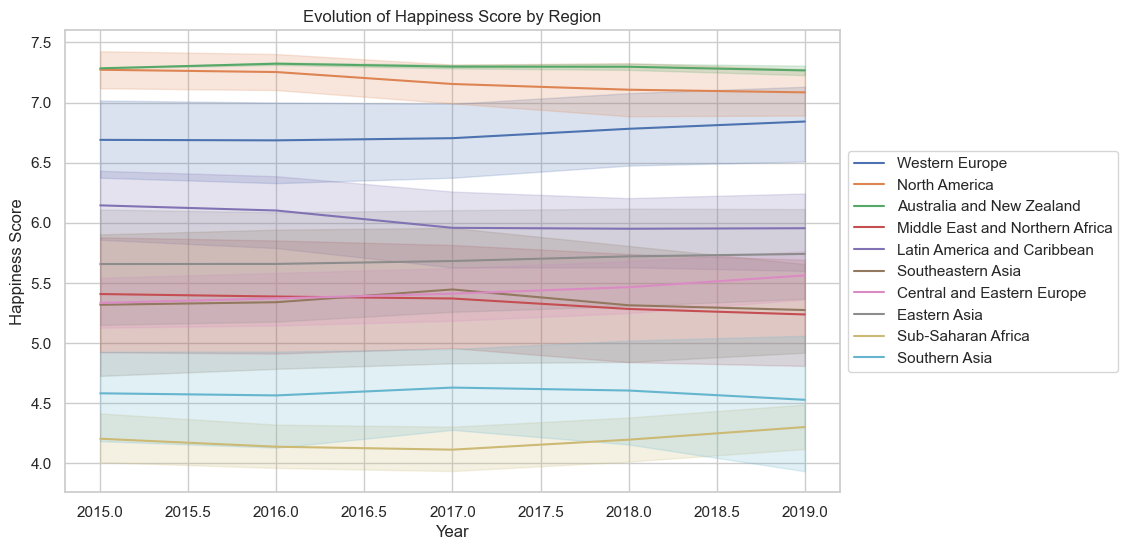

In [1894]:
# Show a line graph with the evolution of happiness per region over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=dfHAll, x='Year', y='Happiness Score', hue='Region')
plt.title('Evolution of Happiness Score by Region')
# Show the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Aqui pode-se ver a evolução da felicidade nas várias regiões ao longo dos anos.

### Usando violinos, para aferir variancias usando o rank

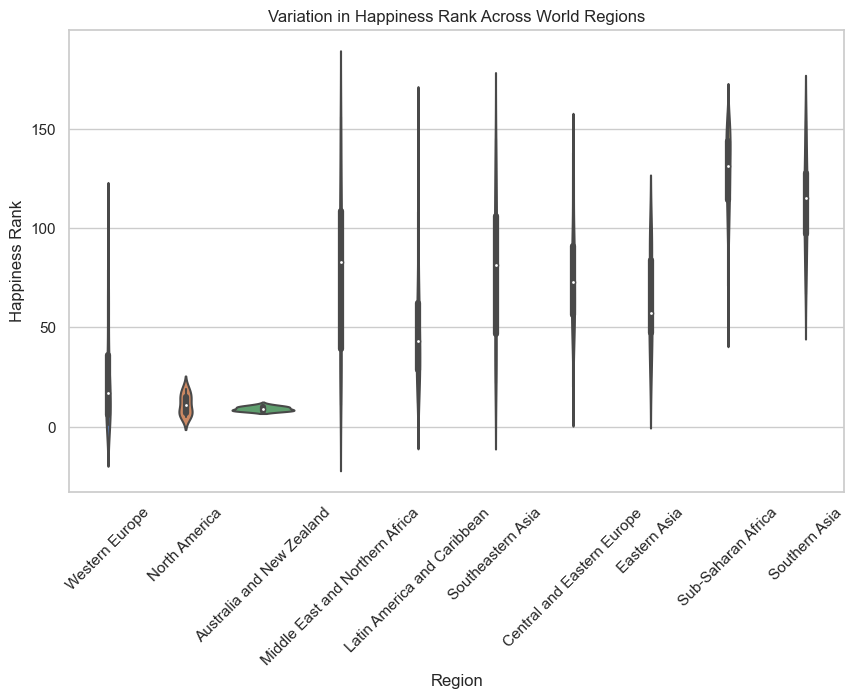

In [1895]:
# Draw a violin plot titled Variation in Happiness Ranks Across World Regions
plt.figure(figsize=(10, 6))
sns.violinplot(data=dfHAll, x='Region', y='Happiness Rank')
plt.title('Variation in Happiness Rank Across World Regions')
plt.xticks(rotation=45)
plt.show()

Nota-se que existiram variancias tanto na américa do Norte como na Austrália e Nova Zelândia.

#### Verificar se tanto o US ou o canadá mudaram de rank baseado no visto anteriormente

Aqui o gráfico tem que ser invertido pois o rank é visto ao contrário (quanto mais baixo, melhor)

/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with 

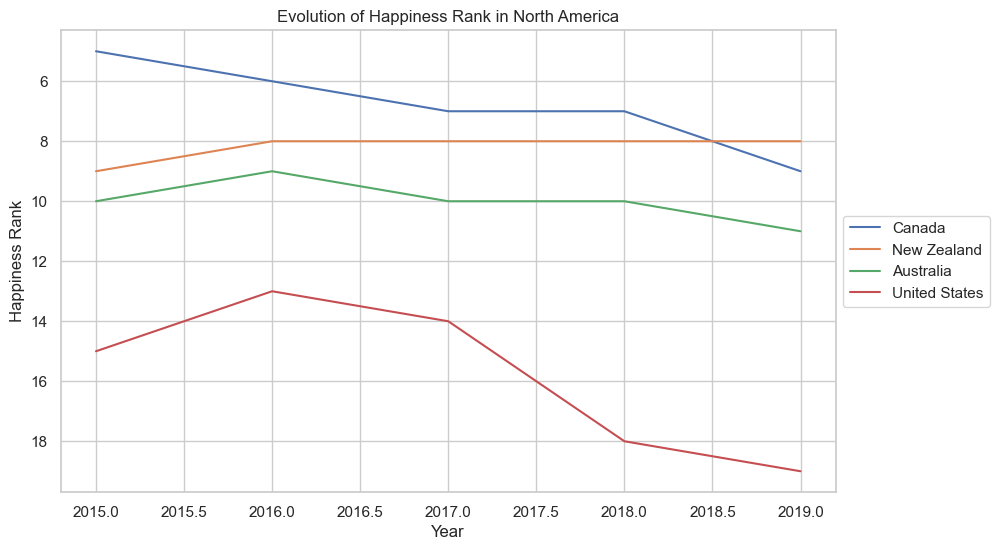

In [1896]:
# Show a graph with the evolution of rank of the countries in north america and australia over the years
# Show it in reverse because the lower the rank the better
# in the graph show the countries withing that region
plt.figure(figsize=(10, 6))
# Draw a line plot with the evolution of happiness rank in those regions over the years
sns.lineplot(data=dfHAll[(dfHAll['Region'] == 'North America') | (dfHAll['Region'] == 'Australia and New Zealand')], x='Year', y='Happiness Rank', hue='Country')


plt.title('Evolution of Happiness Rank in North America')
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



Verifica-se que todos, à exceção da Nova Zelândia, têm viso a decrescer em felicidade. Seria interessante, se tivesse os dados, olhar para o Canadá nos ultimos anos, onde têm havido alguns tumultos sociais desde os anos de Sars-Covid.

### Comparar a felicidade com o GDP ao longo dos anos

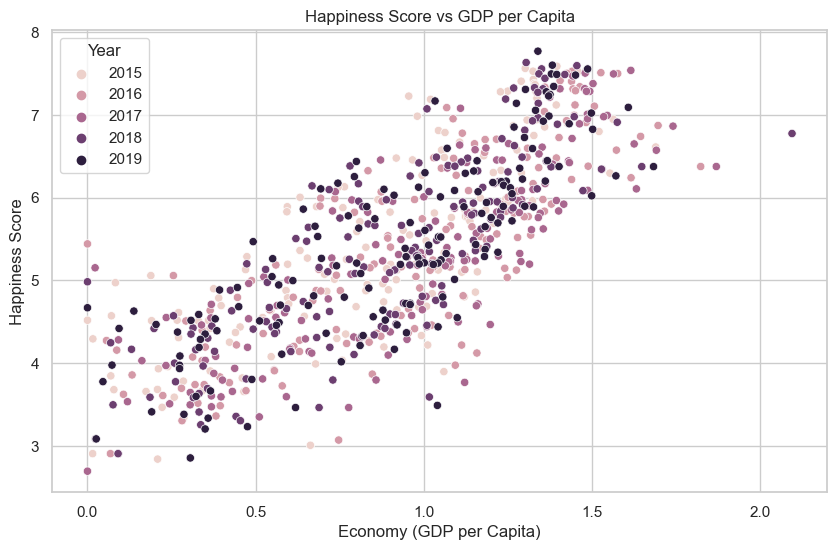

In [1897]:
# Compare happiness and GDP over the years
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfHAll, x='Economy (GDP per Capita)', y='Happiness Score', hue='Year')
plt.title('Happiness Score vs GDP per Capita')
plt.show()

Aqui pode-se afirmar que, a felicidade está realmente associada ao GDP e que paises mais ricos têm tendencia a ser mais felizes, ou a ter melhor resultado nestes testes!

#### Mesmo assim, vamos tentar identificar os outliers

Para tal, precisamos de um dataset com a média dos vários anos

In [1898]:
# Create a new dataset that is the average of the years of the dfHAll dataset
dfHAll_avg = dfHAll.groupby(['Country', 'Region'])[['Happiness Score', 'Economy (GDP per Capita)']].mean().reset_index()

Usamos um threshold de 2 para tentar identificar cartas fora do baralho e assim aprofundar a nossa análise.

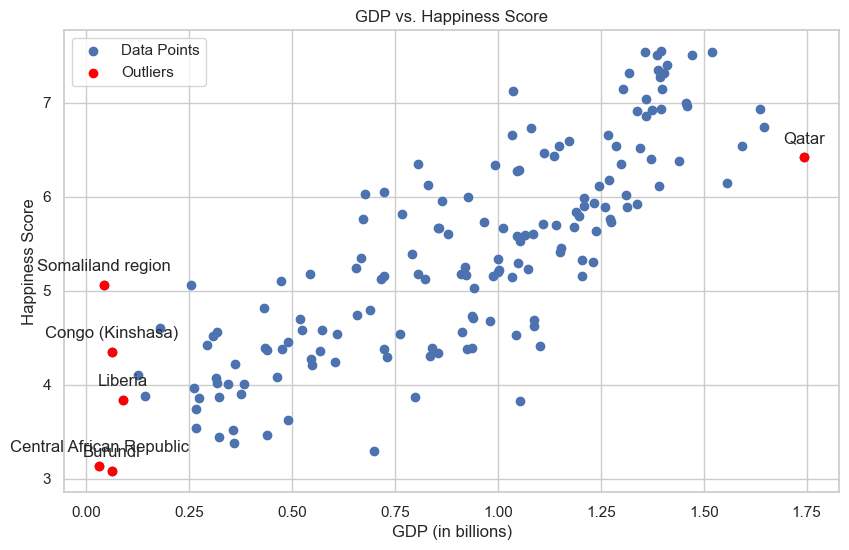

In [1899]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the z-scores to identify outliers
dfHAll_avg['GDP_zscore'] = (dfHAll_avg['Economy (GDP per Capita)'] - dfHAll_avg['Economy (GDP per Capita)'].mean()) / dfHAll_avg['Economy (GDP per Capita)'].std()
dfHAll_avg['Happiness_zscore'] = (dfHAll_avg['Happiness Score'] - dfHAll_avg['Happiness Score'].mean()) / dfHAll_avg['Happiness Score'].std()

# Define a threshold to identify outliers
threshold = 2

# Identify outliers
outliers = dfHAll_avg[(dfHAll_avg['GDP_zscore'].abs() > threshold) | (dfHAll_avg['Happiness_zscore'].abs() > threshold)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(dfHAll_avg['Economy (GDP per Capita)'], dfHAll_avg['Happiness Score'], label='Data Points')
plt.scatter(outliers['Economy (GDP per Capita)'], outliers['Happiness Score'], color='red', label='Outliers')

# Annotate outliers
for i, row in outliers.iterrows():
    plt.annotate(row['Country'], (row['Economy (GDP per Capita)'], row['Happiness Score']), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('GDP (in billions)')
plt.ylabel('Happiness Score')
plt.title('GDP vs. Happiness Score')
plt.legend()
plt.show()



Aqui conseguimos ver, com um threshold de 2.1 que existem paises que, apesar de pobres, são mais felizes e que outros, como o Catar que, apesar de rico, fica abaixo de outros menos ricos mas com mais felicidade.

### Carregar apenas 2019 para dataset final


In [1900]:

dfHappiness = pd.read_csv('Dados/worldhappinessreport/2019.csv')
#Rename the column named 'Country (region)' to 'Country_Name'
dfHappiness.rename(columns={'Country or region': 'Country_Name'}, inplace=True)
#Ensure consistent formatting for merging
dfHappiness['Country_Name'] = dfHappiness['Country_Name'].str.strip().str.lower()
#Merge the happiness dataset with the merged dataset
dfMergedHappiness = pd.merge(dfMerged, dfHappiness, how='inner', on='Country_Name')
#Remove the column named "Atribute_Description"
dfMergedHappiness.drop(columns='Attribute_Description', inplace=True)
dfMergedHappiness['Region'] = dfMergedHappiness['Region'].str.strip().str.lower()

#Show the first few rows of the merged dataset
dfMergedHappiness.head()



,Country_Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Phones_zscore,Coffee Domestic Consumption,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,argentina,latin amer. & carib,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,-0.068693,2094.736842,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
1,australia,oceania,20264082,7686850,"2,6","0,34","3,98","4,69",29000.0,"100,0",...,1.444958,47.901639,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290
2,benin,sub-saharan africa,7862944,112620,"69,8","0,11",0,85,1100.0,"40,9",...,-0.992849,730.315789,102,4.883,0.393,0.437,0.397,0.349,0.175,0.082
3,bolivia,latin amer. & carib,8989046,1098580,"8,2","0,00","-1,32","53,11",2400.0,"87,2",...,-0.720032,1505.000000,61,5.779,0.776,1.209,0.706,0.511,0.137,0.064
4,cameroon,sub-saharan africa,17340702,475440,"36,5","0,08",0,"68,26",1800.0,"79,0",...,-1.010393,0.660000,96,5.044,0.549,0.910,0.331,0.381,0.187,0.037


Verifica-se novamente todo o dataset para garantir que já não existem valores vazios.

In [1901]:
# Check for missing values in each column
missing_valuesHapiness = dfMergedHappiness.isna().sum()
print(f'Missing values in each column Hapinesss:\n {missing_valuesHapiness}\n')


Missing values in each column Hapinesss:
 Country_Name                          0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
GDP_zscore                            0
Phones_zscore                         0
Coffee Domestic Consumption           0
Overall rank                          

## Grava-se num ficheiro para poder usar nos dashboards
Durante este trabalho as várias partes importantes são gravadas em ficheiro. Primeiro para poder usar ferramentas como o excel para pesquisa de dados (pois posso estar a aplicar algum filtro mal) e segundo para ficar com um histórico do que foi feito e assim com memória futura.

#### Antes disso, eliminar algumas colunas que não vamos usar

In [1902]:
# remove the column "generosity" from the dataset
dfMergedHappiness.drop(columns=['Climate','Birthrate','Deathrate','Agriculture','Industry','Service','Arable (%)','Crops (%)','Other (%)','Literacy (%)','Net migration','Coastline (coast/area ratio)','Social support','Phones_zscore','GDP_zscore','GDP per capita','Freedom to make life choices','Perceptions of corruption','Generosity','Healthy life expectancy'], inplace=True)


In [1903]:
dfMergedHappiness.tail()

,Country_Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Coffee Domestic Consumption,Overall rank,Score
47,united states,northern america,298444215,9631420,"31,0","6,5",37800.0,898.0,17.049180,19,6.892
48,vietnam,asia (ex. near east),84402966,329560,"256,1","25,95",2500.0,187.7,16.950820,94,5.175
49,yemen,near east,21456188,527970,"40,6","61,5",800.0,37.2,199.032787,151,3.380
50,zambia,sub-saharan africa,11502010,752614,"15,3","88,29",800.0,8.2,1559.032787,138,4.107
51,zimbabwe,sub-saharan africa,12236805,390580,"31,3","67,69",1900.0,26.8,4163.421053,146,3.663


In [1904]:
# Save the merged dataset to a CSV file
dfMergedHappiness.to_csv('DadosTratados/dfDashboards.csv', index=False)

# Usar Transformações

Aqui, dou-lhes um uso expecifico para mostrar os 5 regiões mais felizes e menos felizes. Faço uso de agrupação Por (região e Score) e calculo a média. Depois mudo o nome da coluna resultando, substituindo-a, para que reflita mais precisamente o resultado calculado. Por fim ordena-se por ordem descendente para que se veja em primeiro lugar aquele que tem melhor resultado.

### Os 5 mais felizes

In [1905]:
# Use a transformation to create a new DataFrame that contains the average happiness score for each region
dfindexRegionHappiness = dfMergedHappiness.groupby('Region')['Score'].mean().reset_index()
# Rename the 'Score' column to 'Average Happiness Score'
dfindexRegionHappiness.rename(columns={'Score': 'Average Happiness Score'}, inplace=True)
# Order it in descending order
dfindexRegionHappiness = dfindexRegionHappiness.sort_values(by='Average Happiness Score', ascending=False)
# Display the top 5 happiest regions
dfindexRegionHappiness.head()


,Region,Average Happiness Score
9,western europe,7.554000
7,oceania,7.267500
6,northern america,7.085000
3,latin amer. & carib,6.015083
2,eastern europe,5.517500


Pode-se vêr que, na Europa é onde, segundo esta estatistica, as pessoas são mais felizes. Resultado esperado.

Em baixo, faz-se o inverso usando a funcionalidade "tail" que mostra os ultimos. Como já está ordenado, não é preciso fazer mais nada.

### Os mais infelizes

In [1906]:
# Display the bottom 5 happiest regions by descending order
dfindexRegionHappiness.tail()

,Region,Average Happiness Score
0,asia (ex. near east),5.338250
1,c.w. of ind. states,5.263000
5,northern africa,4.687000
8,sub-saharan africa,4.387429
4,near east,4.376500


Aqui vês que claramente África sub-sariana é onde as pessoas vivem pior, logo seguido pelo médio oriente. Curiosamente (ou não) as regiões do globo mais assoladas por guerras.

## Demonstrar os dados graficamente

Aqui faço alguns gráficos que considero interessantes e apresento análise.

### Top 10 consumo de café

<Axes: xlabel='Country_Name'>

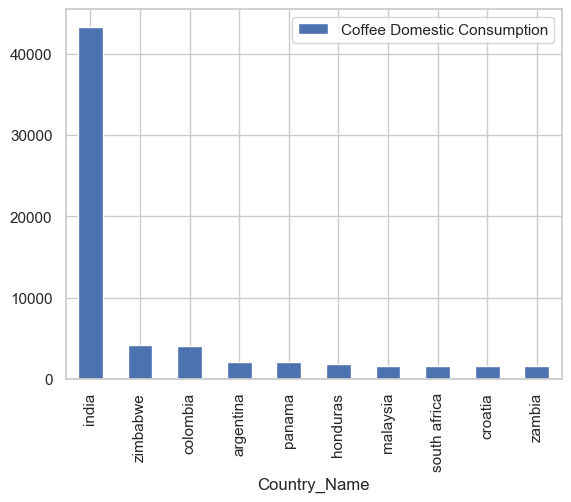

In [1907]:
# Show the top 10 countries with the highest coffee consumption
# Show a bar graph
dfMergedHappiness.sort_values('Coffee Domestic Consumption', ascending=False).head(10).plot(x='Country_Name', y='Coffee Domestic Consumption', kind='bar')



Este consumo representa, o consumo do que generelasticamente considerariamos como consumo de café (bicas, café soluvel, café de supermercado,etc) mas neste dado também aparece consumo de café para industria, como torrefações. Ora é normal que o Brazil apareça destacadissimo pois é o maior produtor do mundo, conhecidamente.
Uma vez mais, a limitação do dataset ao não nos deixar ver em detalhe os paises Europeus torna-se frustrante. Seria interessante analisar Portugal e o impacto de industrias como a Delta, Camelo entre outras.

Vamos olhar então para a coluna "Soluble Dom. Cons" a ver se nos dá os dados que queremos

In [1908]:
# Show the top 10 countries with the highest coffee consumption
# Show a bar graph
dfCoffee_grouped = dfCoffee[dfCoffee['Attribute_Description'] == 'Soluble Dom. Cons'].groupby('Country_Name').sum()
dfCoffee_avg = dfCoffee.groupby(['Country_Name', 'Attribute_Description'])['Value'].mean().reset_index()
dfCoffee_filtered = dfCoffee_avg[dfCoffee_avg['Attribute_Description'] == 'Soluble Dom. Cons']
#Change the column named Value to Coffee Domestic Consumption
dfCoffee_filtered.rename(columns={'Value': 'Soluble Dom. Cons'}, inplace=True)
dfCoffee_filtered.head()
#dfCoffee_filtered.sort_values('Soluble Dom. Cons', ascending=False).head(10).plot(x='Country_Name', y='Soluble Dom. Cons', kind='bar')


/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_3556/770640775.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered.rename(columns={'Value': 'Soluble Dom. Cons'}, inplace=True)


,Country_Name,Attribute_Description,Soluble Dom. Cons


### Ainda top 10.. mas para a Europa

(Aqui consegue-se vêr a limitação do dataset que não contem nenhum pais pertencente à EU)

<Axes: xlabel='Country_Name'>

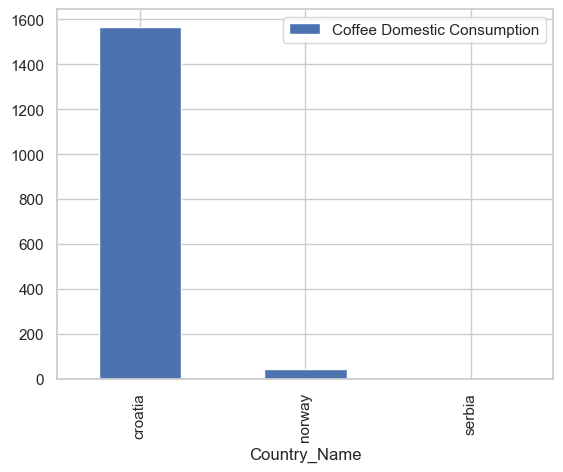

In [1909]:
# Show the top 10 countries with the highest coffee consumption where Region is like "EUROPE"
# Show a bar graph
dfMergedHappiness[dfMergedHappiness['Region'].str.contains('EUROPE', case=False)].sort_values('Coffee Domestic Consumption', ascending=False).head(10).plot(x='Country_Name', y='Coffee Domestic Consumption', kind='bar')


Apesar de ser o Pais mais pequeno, a Suiça lidera este rank limitado. Isto suscitou curiosidade e fui encontrar este artigo: 
https://www.cbi.eu/market-information/coffee/switzerland/market-potential
Pelo que pude analisar, é assim pois tem uma industria relativamente grande de produção de produtos derivados de café. Fica assim explicada esta liderança.

### Plot
Para este tipo de dados é o que faz mais sentido.
Neste é visivel que não existe relação entre o consumo de café e a felicidade! Este era um dos principais objectivos deste trabalho, responder a esta pergunta. Atrás também já tinhamos visto que este consumo doméstico não é propriamente o que quereriamos para fazer esta analise. Precisavamos de um numero de café "vendido internamente", separado por café soluvel, grão entre outras caracteristicas.

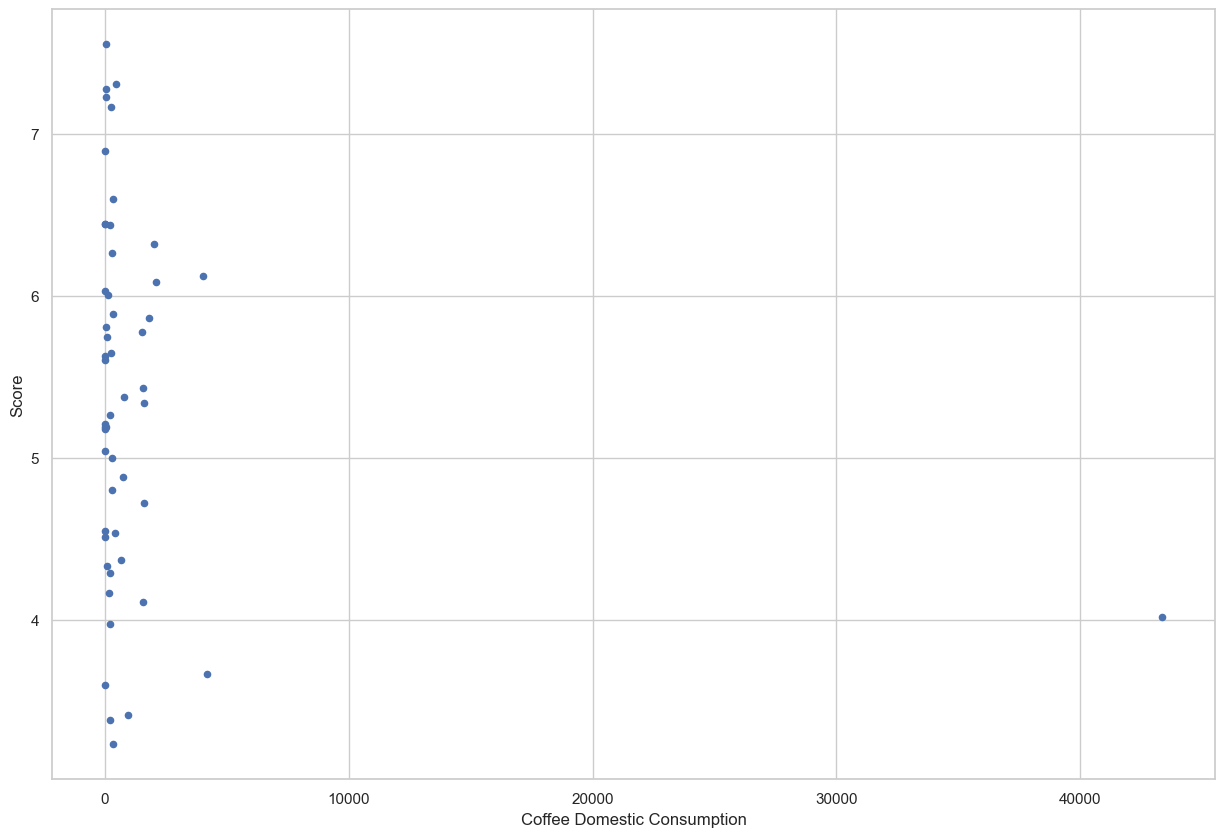

In [1910]:
import matplotlib.pyplot as plt
#Compare with a plotter graph both the coffe consumption and the happiness score
dfMergedHappiness.plot(x='Coffee Domestic Consumption', y='Score', kind='scatter', figsize=(15, 10))
plt.show()

Mas e se conseguir o consumo de café

### "Brincar" com os dados

Quando se "brinca" com dados, podem aparecer padrões que nunca esperariamos encontrar. É portanto importante que, quando se investiga possiveis correlações entre dados, que não se façam apenas aquelas que parecem "lógicas" mas também outras que podem parecer menos apropriadas. Procura-se portanto, padrões. Nos dias que correm, tecnologias como IA- Machine Learning, permitem fazer este tipo de associações com maior facilidade. Não é tema deste trabalho e fica apenas como nota.

### Per capita
Vamos criar uma coluna de consumo per-capita.
Aqui pode-se ver que, se se analisar per capita, o grafico tente mais para a direita mas continua sem se poder vêr uma relação direta.

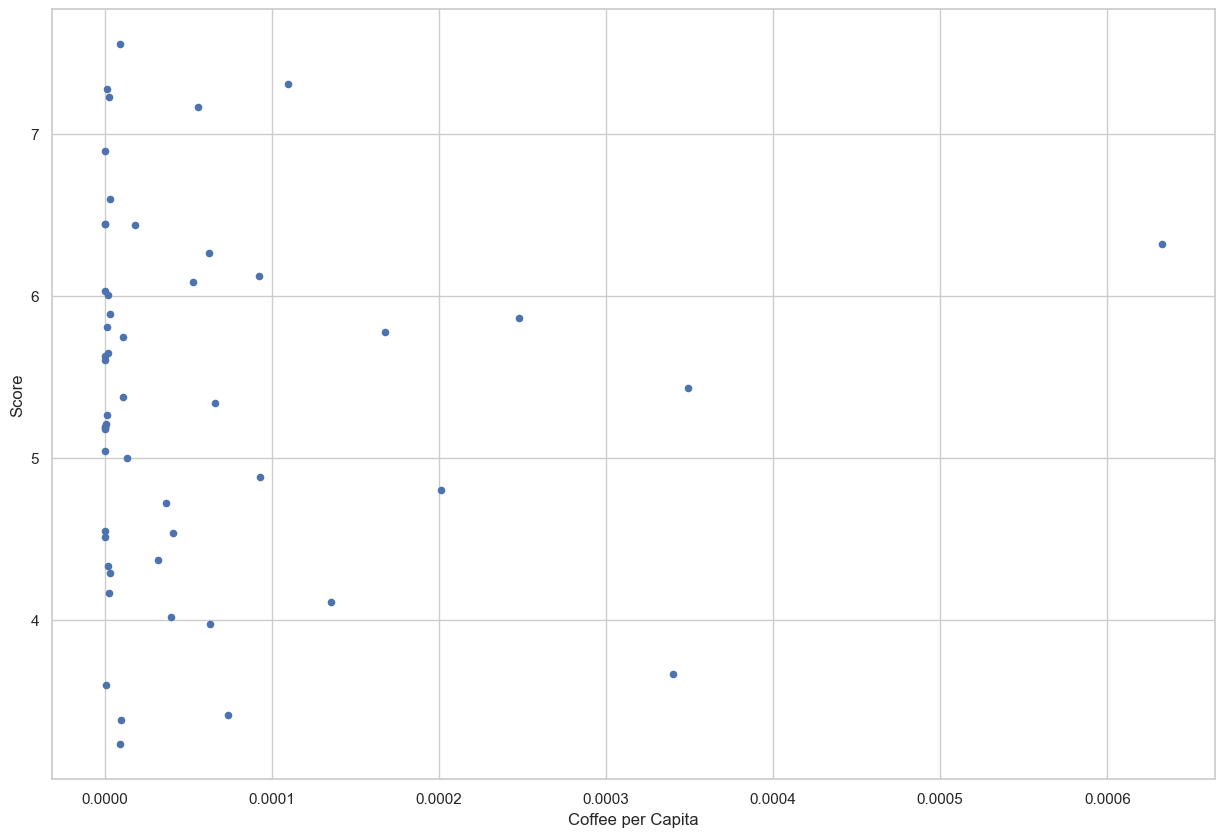

In [1911]:
#Create a new column named coffee per capita based on the coffee consumption and the population
dfMergedHappiness['Coffee per Capita'] = dfMergedHappiness['Coffee Domestic Consumption'] / dfMergedHappiness['Population']
#Plot the happiness score against the coffee per capita
dfMergedHappiness.plot(x='Coffee per Capita', y='Score', kind='scatter', figsize=(15, 10))
plt.show()

### Verificar se a àrea tem influencia

In [1912]:
#Save the file
dfMergedHappiness.to_csv('DadosTratados/AllMerged.csv', index=False)


In [1913]:
# Show a new graph with the consumption vs the area but first convert the area to square meters from square miles
dfMergedHappiness['Area (sq. mi.)'] = pd.to_numeric(dfMergedHappiness['Area (sq. mi.)'], errors='coerce') * 2.58999

# Rename the column to Area (sq. km.)
dfMergedHappiness.rename(columns={'Area (sq. mi.)': 'Area (km2)'}, inplace=True)
dfMergedHappiness['Coffee per Area'] = dfMergedHappiness['Coffee Domestic Consumption'] / dfMergedHappiness['Area (km2)']


### Analise via gráfico de barras

Nesta análise, o que salta à vista são os paises mais pequenos. Isto é espectável pois paises pequenos que tenham consumos "elevados" vão-se destacar. Podemos também ver que a densidade populacional está presente. Singapura, que é de longe o Pais com maior densidade para a àrea que tem, destaca-se neste gráfico.

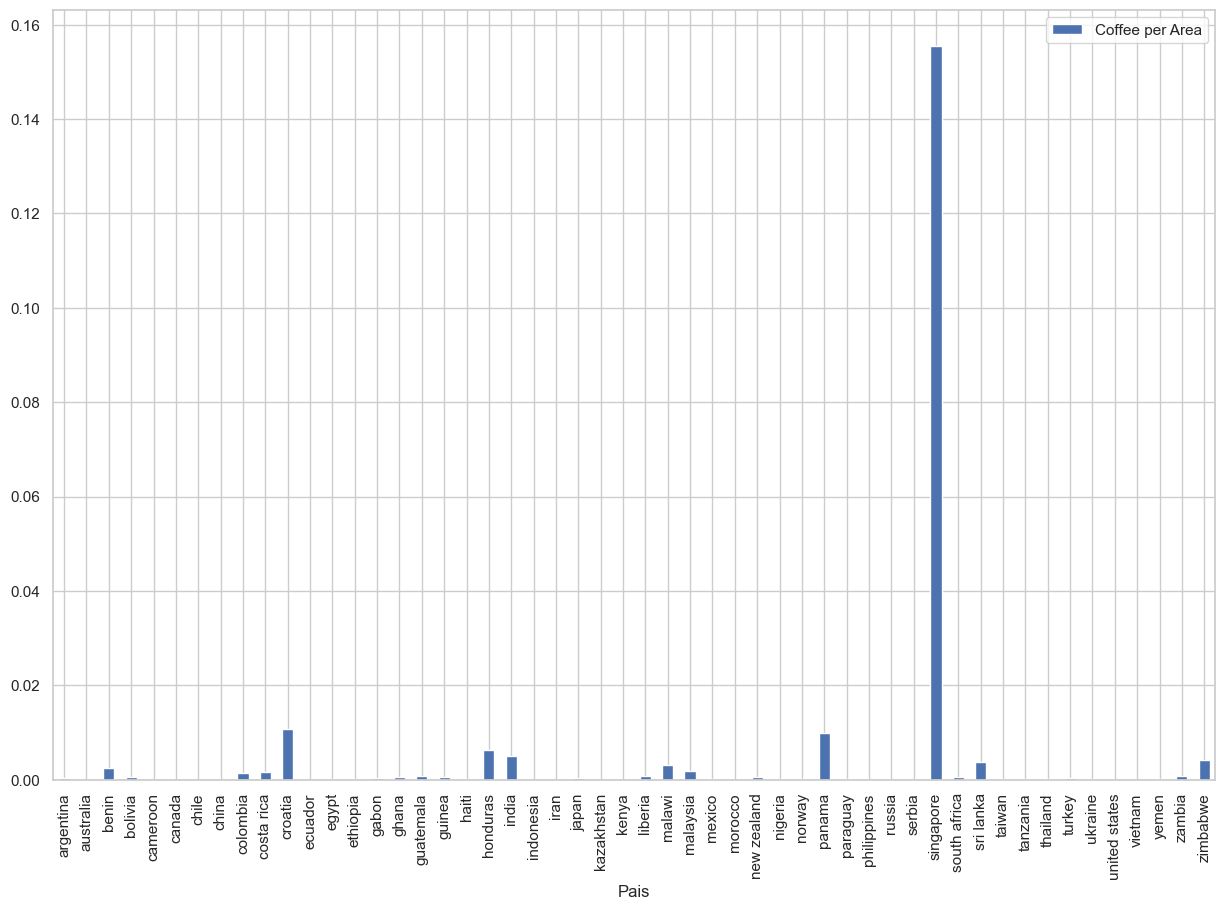

In [1914]:

# Show a bar graph with the coffee consumption per area
dfMergedHappiness.plot(x='Country_Name', y='Coffee per Area', kind='bar', figsize=(15, 10))
# Rename x-axis label
plt.xlabel('Pais')
plt.show()
